### <center> The Rational Root Investigation Notebook </center>

<center> Tony Smaldone </center>

Welcome to the rational root investigation notebook. This notebook is designed to allow the student to explore the identification of **possible** rational roots of $f(x) = 0$ and which, if any, are actual roots. For the purposes of this notebook, $f(x)$ is limited to a single variable polynomial with **integer** coefficients. That is,

$$
f(x) = a_{n}x^{n} + a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + \dots + a_{2}x^2 + a_{1}x + a_{0}
$$

where $a_{n} \in \mathbb{Z}$. 

For any given $f(x)$, the number of roots that exist will be per the *Fundamental Theorem of Algebra* and as many as possible will be found, inclusive of the identification of repeated roots. The focus of this notebook, however, is on the roots which are rational, but, where possible, the *quadratic formula* will be used to identify non rational (inclusive of complex) roots.

The identification of rational roots will be via the implementation of the *Rational Root Theorem* and the determination of which, if any, are roots will be via *simple* function evaluation and via the implementation of the *Factor Theorem*. There are disadvantages to using just simple function evaluation which (hopefully) will be discovered by the student.

This notebook is, in some ways, a companion to the recently authored (by yours truly) and somewhat more formal, white paper and *interactive app* on the numerical analysis technique of the *Bisection Method* which guarantees the finding of a **real** (not just rational) root in a given interval $[a,b]$, if one exists. Please see [Bisection Method App and White Paper](https://catholicmathguy.shinyapps.io/bisectionmethod/) for complete details.

All software used in this notebook was written in [python](https://www.python.org/) (see *Introduction and Notebook Usage* for more details). This notebook is broken up into the following sections:

* **Introduction and Notebook Usage:** This section provides a brief introduction to the software and the usage of this *jupyter* notebook
* **Function Definition Section:** This section is where the function of interest is entered (in plain text)
* **Function Plot Section:** This section will make a plot of the function of interest
* **Function Information Section:** This section will report out on the main characteristics (properties) of the function of interest
* **Zero Constant Handling Section:** This section will determine the value of the constant coefficient and if it is zero, make the appropriate software adjustments
* **Identify Possible Rational Roots Section:** This section will identify the **possible** rational roots as defined by the *Rational Root Theorem*
* **Rational Root Finding Via Function Evaluation Section:** This section will determine which, if any, of the possbile rational roots are indeed roots. The *quadratic formula* will be invoked in certain cases.
* **Rational Root Finding Via Synthetic Division Section:** This section will determine which, if any, of the possible rational roots are indeed roots via the implementation of the *factor theorem* and the use of synthetic division. The *quadratic formula* will be invoked in certain cases.
* **Summary / Conclusion:** Brief summary comments.
* **Theorems:** A list of the root finding theorems relevant to the purpose of this notebook.
* **Take The Challenge:** A list of functions used as test functions for the development of the software used herein. These are indicative of those *normally* encountered in academic settings. The reader can challenge him/her self by exploring them first via the good old fashioned paper and pencil (or fountain pen in some cases) method, then exploring them via this notebook.
* **Libraries:** The software developed was extensive, especially the parsing routines of the function of interest entered in text form. Given how jupyter notebooks work (per their most intended purposes), libraries were created containing all the developed methods. The names of the libraries and their content os briefly described.
* **Future Enhancements:** It is recognized that there might be (actually, there are) areas for improvement, things to be made clearer, desired new functionality, etc. This section identifies some of these self-identified areas of enhancement. Being quite humble, I fully realize that it is certainly a non-exhaustive list. Feel free to add to the list and make me aware.





#### <center> Introduction and Notebook Usage </center>

This notebook is an implementation of a [Juyter Notebook](https://jupyter.org/), albeit in a very minimalistic way. Though having greater use, a jupyter notebook, in a nutshell, is *an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media*, (ref: [The Jupyter Notebook](https://ipython.org/notebook.html)), and is primarily used in conjunction with software written in [python](https://www.python.org/).

Some brief words on the construct and use instructions of a jupyter notebook. A key element of a jupyter notebook is the **cell**. A cell can contain executable code or markdown formatted documentation (there are others but for these are sufficient to mention here). The executable code can be executed all at once or on a cell-by-cell basis. That is, one can run the entire notebook from beginning to end, or just the code within a particular cell. This allows one to change a parameter, for example, within a cell and rerun just that cell. There are other options, like running all cells below (or above) a cell. This imposes a constraint on how the software is developed.

As mentioned the sofware used in this notebook was written in [python](https://www.python.org/). However, my software was initially written as a stand-alone application before deciding to put within the context of a jupyter notebook. The software was modified to reflect the spirit of a juypter notebook, but it is not one hundred percent. *(Indeed, should it be desired and/or needed, that is one of the listed enhancements.)* It is, however, sufficient for the purposes herein.

Some brief notes about the code:

* The visible code contained herein was minimized to afford readibility yet sufficient enough to allow for understanding. 
* For the most part, no *fancy* code manipulations were used, just written as straight forward as possible. This was, again, to enhance readibility and understanding, especially for those not familiar with python.
* Several libraries were written to better organize the presentation in this notebook and for use in other applications
    + These libraries are described at the bottom of this notebook

#### <center> It is Time To Rock-N-Roll </center>

Enough of the preliminaries. **It's time to rock-n-roll!**

The definition of the libraries needed by the software (both system and self developed as mentioned above) is the first order of business.

In [19]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol, sympify
from parseLib             import *
from plotLib              import *
from polynomialLib        import *
from rationalRootLib      import *
from functionMathRoutines import *
from exploreRationalLib   import *

#### <center> Function Definition Section </center>

The first thing needed is the function for which the rational roots, if there are any, are sought. Again, will be limiting the functions to single variable polynomials with **integer** coefficients. Though a polynomial is of the form

$$
f(x) = a_{n}x^{n} + a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + \dots + a_{2}x^2 + a_{1}x + a_{0}
$$

it is necessary to enter the function in non symbolic form. In other words, in just plain text. The following characters are important to know and are universally understood:

* `*`: multiplication. Example: '2*x' is equivalent to $2x$
* `^`: exponentiation. Example: '2*x^3' is equivalent to $2x^{3}$
    + `**` is an alternative form for exponentiation. Let's standardize on '^'
* `+`: addition. Pretty self explanatory and is mentioned here for completeness
* `-`: subtraction. Pretty self explanatory and is mentioned here for completeness

It is **extremely** important that normal arithmetic **order of operations** be followed.  For example, '2\*x^3\*n' is $2x^{3}n$, not $2x^{3n}$. As is always suggested, parentheses are your friends. If, $2x^{3n}$ is what you truly meant, then it would be entered as '2\*x^(3\*n)'.

It is also **extremely** important that the polynomial is entered by the (universally) accepted convention of the highest power of $x$ be first and the subsequent powers given in descending order. (It is not necessary to list any terms which have zero as the coefficient.)

For example, then, the function $f(x) = 4x^{5} - x^{4} + 20x^{3} - 5x^{2} + 16x - 4$ would be entered as '4\*x^5 - x^4 + 20\*x^3 - 5\*x^2 + 16\*x - 4'

This section, therefore, is where you will enter the function of interest by replacing what is given below for `theFunc`

In [20]:
    theFunc = '4*x^5 - x^4 + 20*x^3 - 5*x^2 + 16*x - 4'
    # store original function 
    theRealFunc = theFunc

#### <center> Function Plot Section </center>

Though not necessary, it is often a good practice to get a rough idea of the characteristics of the function by making a plot (graph) of the function. This section will do just that. 

The **default** range of the inputs is $[-5,5]$. You can change these if needed and/or desired by changing the values for `xMin` and `xMax` in the following block of code then just *rerun* this particular cell.


()

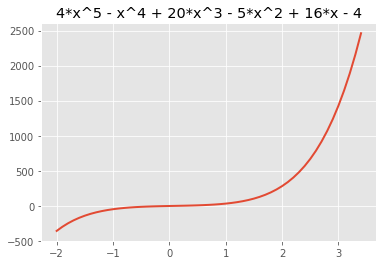

In [21]:
    xMin = -2
    xMax = 3.5
    theInc = 0.1
    xValues = np.arange(xMin, xMax, theInc).tolist()
    yValues = []
    
    f = sympify(theRealFunc)
    for x in xValues:
        fValue = evalFunction(f,x)
        yValues.append(fValue)
    makePlot(xValues, yValues, theRealFunc)

#### <center> Function Information Section </center>

This section will report out on the main characteristics (properties) of the function of interest. These are:

* **Polynomial Degree:** The degree of the polynomial
* **Number of Roots:** The number of roots there are as guaranteed by the *Fundamental Theorem of Algebra*
* **Coefficient List:** The coefficients of the degree $n$ polynomial, inclusive of any zero coefficients

In [22]:
    print('\nProcessing Function:',theFunc)
    theDegree = getPolyDegree(theFunc)
    (allCoeffs,coeffDict) = getAllCoeffs(theFunc)
    coeffList = formCoeffList(coeffDict,theDegree)
    printProcessFuncInfo(theDegree,coeffList)
    print()


Processing Function: 4*x^5 - x^4 + 20*x^3 - 5*x^2 + 16*x - 4

	Function Information
		Polynomial degree      : 5
		Number of roots to find: 5
		Coefficient list       : [4, -1, 20, -5, 16, -4]



#### <center> Zero Constant Handling Section </center>

It is possible that the function of interest would have a zero as the constant coefficient, which **is** perfectly valid. The function $f(x) = 3x^{7} - 4x^{5} + 3x^{2}$ would be an example of where the constant coefficient is zero. This section will identify this to be case and update the software accordingly. Basically, if the constant coefficient is zero, at least one $x$ can be factored out of the function and will mean that a zero (or repeated zeros) need be included in the list of roots.

In [23]:
    useReducedFunc = False
    theConstCoeff = getConstCoeff(theFunc)
    numRemoved = 0
    if (theConstCoeff == 0):
        (numRemoved,reducedFunc) = zeroConstHandling(coeffList)
        rDegree = getPolyDegree(reducedFunc)
        (rCoeffs,rCoeffDict) = getAllCoeffs(reducedFunc)
        rCoeffList = formCoeffList(rCoeffDict,rDegree)
        theFunc = reducedFunc
        useReducedFunc = True
        printZeroConstInfo(numRemoved,reducedFunc,rDegree,rCoeffList)
        print()
    else:
        print('The constant coefficient is',theConstCoeff)

The constant coefficient is 4


#### <center> Identify Possible Rational Roots Section </center>

This section will identify the **possible** rational roots by determining the factors of the constant and leading coefficients and via the *Rational Root Theorem* create the ratio of the plus/minus factors. It is quite possible that duplicate possible rational roots will result and, if so, this section will remove any duplicates. 

In [24]:
    print('\n\tIdentify Possible Rational Roots')
    if useReducedFunc:
        print('\t\tUsing factored function',theFunc)
    theConstCoeff   = getConstCoeff(theFunc)
    constFactors    = findFactors(theConstCoeff)
    theLeadingCoeff = getLeadingCoeff(theFunc)
    leadingFactors  = findFactors(theLeadingCoeff)
    (posRatlRoots,listOfPosRatlRoots) = getPosRatlRoots(theFunc)
    printRatlRootInfo(theConstCoeff,constFactors,
                      theLeadingCoeff,leadingFactors,
                      posRatlRoots,listOfPosRatlRoots)
    print()


	Identify Possible Rational Roots
		Factors of constant coefficient: 4
			 [1, 2, 4]
		Factors of leading coefficient: 4
			 [1, 2, 4]
		Possible rational roots
			 [1, -1, 1/2, -1/2, 1/4, -1/4, 2, -2, 1, -1, 1/2, -1/2, 4, -4, 2, -2, 1, -1]
		Possible rational roots (duplicates removed)
			 [1, 2, -1/2, 4, 1/2, 1/4, -2, -1/4, -4, -1]



#### <center> Rational Root Finding Via Function Evaluation Section </center>

Once the **possible** rational roots have been identified, this section will determine which, **if any**, of those possbile rational roots are indeed roots. This is done via the evaluation of the function at a possible root and see if it satisfies $f(x) = 0$. This method of root determination has (several) disadvantages. It will be left as an exercise to the reader to specifically identify these disadvantages.

**Any repeated zero roots will be added to the list of indentified roots!!**

In [25]:
    print('\n\tRational Root Finding Via Function Evaluation')
    print('\t\tFunction:',theRealFunc)
    if useReducedFunc:
        print('\t\tThere was a constant coefficient of zero')
        print('\t\tWill proceed using the reduced (factored) function')
        print('\t\t\t',theFunc)
    theRoots = findRootsViaFuncEval(theFunc,listOfPosRatlRoots)
    if len(theRoots) == 0:
        print('\t\tNo rational roots found via function evaluation')
    else:
        print('\t\tRational roots found via function evaluation:')
        print('\t\t\t',theRoots)
    if useReducedFunc:
        numRootsToFind = getPolyDegree(theFunc)
    else:
        numRootsToFind = theDegree
    rDegree = getPolyDegree(theFunc)
    if useReducedFunc:
        print('\t\tNow add the zero roots')
        for i in range(0,numRemoved):
            theRoots.append(0)
        print('\t\t\t',theRoots)
    if len(theRoots) != theDegree:
         print('\t\tThere are still',theDegree - len(theRoots),' roots to find')
    else:
         print('\t\tAll roots were found for',theRealFunc)
         print('\t\t\t',theRoots)


	Rational Root Finding Via Function Evaluation
		Function: 4*x^5 - x^4 + 20*x^3 - 5*x^2 + 16*x - 4
		Rational roots found via function evaluation:
			 [1/4]
		There are still 4  roots to find


#### <center> Rational Root Finding Via Synthetic Division Section </center>

This section will implement the *factor theorem* to determine if a **possible** rational root is indeed a root (that is, satifies $f(x) = 0$. The determination method used here is via the implementation of synthetic division. 

If the original function or the the lesser degree function resulting from the finding of a rational root is a quadratic, the *quadratic formula* will be invoked to yield the non-rational (inclusive of complex) roots.

Any repeated zero roots will be added to the list of indentified roots.

In [26]:
    print('\n\tRoot Finding Via Synthetic Division')
    print('\t\tFunction:',theRealFunc)
    if useReducedFunc:
        print('\t\tThere was a constant coefficient of zero')
        print('\t\tWill proceed using the reduced (factored) function')
        print('\t\t\t',theFunc)
    (theRoots,returnCoeffList) = findRootsViaSD(theFunc,listOfPosRatlRoots)
    if len(theRoots) == 0:
        print('\t\tNo rational roots found via synthetic division')
    else:
        print('\t\tRational roots found via synthetic division:')
        print('\t\t\t',theRoots)
    if useReducedFunc:
        numRootsToFind = getPolyDegree(theFunc)
    else:
        numRootsToFind = theDegree
    if useReducedFunc:
        print('\t\tNow add the zero roots')
        for i in range(0,numRemoved):
            theRoots.append(0)
        print('\t\t\t',theRoots)
    if (theDegree - len(theRoots)) == 2:
        print('\t\tThere are still two roots to find; will find the roots via the quadratic formula')
        fromQuadFormula = solveQuadratic(returnCoeffList)
        theRoots.append(fromQuadFormula[0])
        theRoots.append(fromQuadFormula[1])
        print('\t\t\t',fromQuadFormula)
        print('\t\tThe roots found so far')
        print('\t\t\t',theRoots)

    if len(theRoots) != theDegree:
         print('\t\tThere are still',theDegree - len(theRoots),' roots to find')
    if len(theRoots) == theDegree:
         print('\t\tAll roots were found for',theRealFunc)
         print('\t\t\t',theRoots)


	Root Finding Via Synthetic Division
		Function: 4*x^5 - x^4 + 20*x^3 - 5*x^2 + 16*x - 4
		Rational roots found via synthetic division:
			 [1/4]
		There are still 4  roots to find


#### <center> Summary / Conclusion </center>

This notebook provided for the exploration of root finding, rational roots in particular, for single variable polynomials with integer coefficients.

#### <center> Theorems </center>

The following are the **key** theorems we discussed and will be using in our quest to solve $f(x) = 0$ (that is finding the roots, or zeros, where a root is the value of $x$ such that the function when evaluated at $x$ will cause the function to be zero). You might sometimes see these theorems with slightly different names and/or different descriptions, depending on the needed formality and context. Hence, what follows are the fundamental nature of each theorem, perhaps slightly paraphrased, and how will be using them in this class. Most, but **not** all of these theorems pertain to single-variable polynomials with real and/or integer coefficients (which is where our attention will be initially focused). Recall a polynomial is:

$$
f(x) = a_{n}x^{n} + a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + \dots + a_{2}x^2 + a_{1}x + a_{0}
$$

There are other *tools* that can be useful to finding roots and we will mention them in class, but they are not always useful so are not listed here. A key component to our discussion of root finding will also be *numerical analysis* techniques. 

#### *Remainder Theorem* 

*Given a polynomial, $f(x)$, with real coefficients, when it is divided by $x - c$, for some $c \in \mathbb{C}$, then the remainder, $r$, is the function evaluated at $c$. That is, $f(c) = r$.*

<!-- *[top](#top)* -->

#### *Factor Theorem*

*Given a polynomial, $f(x)$, with real coefficients and some $c \in \mathbb{C}$, $f(c) = 0$ $\iff$ $(x - c)$ is a factor.*

Note: $\iff$ is the symbol for *if and only if*

#### *Fundamental Theorem of Algebra*

There are a number of ways you will see the Fundamental Theorem of Algebra expressed depending on the level of formality and context. For the purposes of this class (consistent with where we are at mathematically), the definition we will be using is as follows:

*Given a polynomial, $f(x)$, with real coefficients and of degree $n$, then there will* **always** *be $n$ roots. The roots may not all be unique (i.e., repeated roots with some multiplicity) and roots may not be real (i.e. can be complex).*

#### *Complex Conjugate Theorem*

*Given a polynomial, $f(x)$, with real coefficients, if the complex number $a + bi$ is a solution to $f(x) = 0$ (a root), then  its conjugate, $a - bi$ is also a solution (root).*

#### *Rational Root Theorem*

*Given a polynomial, $f(x)$, with* **integer** *coefficients, then* **if** *a rational root exists, it will be in $p/q$, where $p$ are the plus/minus factors of the constant coefficient and $q$ are the plus/minus coefficients of the leading coefficient.*

#### *Intermediate Value Theorem*

*For some function, $f$, which is continuous in the interval $[a,b]$, $a < b$, and for some $k$ such that $f(a) < k < f(b)$, then there exists a $c \in (a,b)$ such that $f(c) = k$. $(a,b,c,k \in \mathbb{R})$*

#### *Bolzano Theorem*

*For some function, $f$, which is continuous in the interval $[a,b]$ such that $f(a) < 0 < f(b)$ or $f(a) > 0 > f(b)$, then there exists a $c \in (a,b)$ such that $f(c) = 0$. $(a,b,c \in \mathbb{R})$*

#### <center> Take The Challenge </center>

Consider trying the following functions. These were just a handful of functions used to verify the software created for this notebook. Try them yourselves, first by hand, then using this notebook. **(Remember to enter the function in the software as described above.)**

* $f(x) = -3x^{2} - 4x + 1$
* $f(x) = x$
* $f(x) = 3x^{2} + 5x - 2$
* $f(x) = x^{5} - x^{4} + 3x^{2} - 22$
* $f(x) = -x^{4} + 16$
* $f(x) = -56x^{3} - 22x + 34$
* $f(x) = -56x^{3} - 22x^{2} + x$
* $f(x) = -23x^{3} - x$
* $f(x) = x^{2}$
* $f(x) = -x^{2}$
* $f(x) = 88x - 5$
* $f(x) = -4x^{2} - 3x$
* $f(x) = -36x^{6} - x^{4} + 3x - 22$
* $f(x) = -2x^{4} - 4x^{3} + 1$
* $f(x) = x^{3} - 2x^{2} - 5x + 6$
* $f(x) = x^{3} - x$
* $f(x) = x^{2} - 4x + 13$
* $f(x) = x^{5} - 4x^{4} + 13x^{3}$
* $f(x) = x^{3} - 3x + 2$
* $f(x) = x^{4} - 2x^{2} + 1$
* $f(x) = x^{4} - 2x^{3} + 2x^{2} - 2x + 1$
* $f(x) = x^{2} - 4x + 4$
* $f(x) = 6x^{2} - x - 1$
* $f(x) = 2x^{3} - x^{2} + 2x - 1$
* $f(x) = 4x^{5} - x^{4} + 20x^{3} - 5x^{2} + 16x - 4$
* $f(x) = 2x^{3} - 9x^{2} + 30x - 13$
* $f(x) = 24x^{3} + 46x^{2} - x - 14$
* $f(x) = x^{3} - 5x^{2} + 3x + 6$
* $f(x) = 4x^{3} - 3x^{2} - 25x - 6$
* $f(x) = x^{5} - 4x^{4} - 7x^{3} + 14x^{2} - 44x + 120$
* $f(x) = 3x^{3} - x^{2} - x + 4$
* $f(x) = x^{3} - x^{2} + 2x - 2$
* $f(x) = 2x^{5} + x^{4} - 2x - 1$
* $f(x) = x^{4} + x^{3} - 16x^{2} - 58x - 60$
* $f(x) = 2x^{5} + x^{4} - 2x - 1$
* $f(x) = x^{4} - 7x^{3} + 17x^{2} - 17x + 6$

#### <center> Libraries </center>

Several of these libraries were written by me to better organize the presentation in this notebook and for use in other applications. In particular, these libraries are:

* `parseLib`: Contains the routines to parse the function of interest entered as ASCII text into its usable components (this was the most time consuming part)
* `plotLib`: Constains the plot routine(s)
* `polynomialLib`: Contains the routines specific to polynomial manipulation, evaluation, etc.
* `rationalRootLib`: Contains the routines to identify possible rational roots and the determination if any are indeed roots
* `functionMathRoutines`: Contains the routines independent of the specific application of rational root determination (examples are function evaluation and implementation of the quadratic formula)
* `exploreRationalLib`: Contains the routines to report the findings of the exploration of rational roots within each of the above sections (that is the specific output of relevant information)

#### <center> Future Enhancements </center>

It is recognized that there might be (actually, there are) areas for improvement, things to be made clearer, desired new functionality, etc. What follows is a list of some of these self-identified areas of enhancement / improvement that I'm contemplating should I ever get some **spare** time (ha). Being quite humble, I fully realize that what follows is certainly a non-exhaustive list (was initially construed as a placeholder for reminders to myself but figured I'd put it out there). Feel free to add to the list and make me aware.

* Reorganize the code to be fully within the spirit of the `python jupyter notebook`concept
* Add the ability to enter a root (nclusive of a complex root) and then proceed from there
* Clarification of anything that might need further explanation
* Better presentation of the output